# MNIST (Modified National Institute of Standards and Technology database)

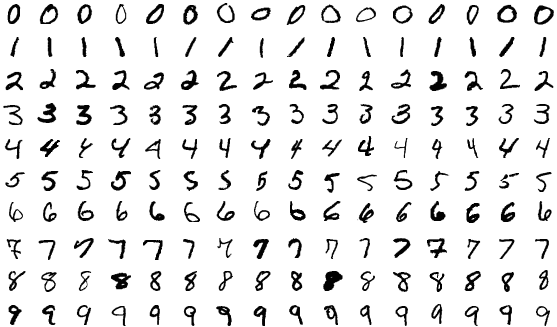

## Dependências

In [ ]:
import tensorflow as tf
import PIL
import numpy as np

## Utils

In [ ]:
def load_normalize(filename):

  image = PIL.Image.open(filename)
  image = image.convert("L")
  image = image.resize((28,28))

  # Normalize image to [0, 1]
  image = np.array(image, np.float32)/ 255.0
  image = image.reshape(1,28,28)

  return image

def denormalize(image):
  return (image.reshape(28,28)*255).astype(np.uint8)

## Dataset and Normalization

In [ ]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

train_images = train_images.reshape(train_images.shape[0], 28, 28, 1)  # Adiciona a dimensão de canal
train_images = train_images.astype('float32')  # Converte os valores para float
train_images /= 255  # Normaliza os valores

test_images = test_images.reshape(test_images.shape[0], 28, 28, 1)
test_images = test_images.astype('float32')
test_images /= 255

print(f"Total Training: {len(train_images)}")
print(f"Total Testing: {len(test_images)}")

In [ ]:
i = 0
print(train_labels[i])
print(train_images[i].shape)

PIL.Image.fromarray(denormalize(train_images[i]))

## Model Architecture

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(4, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.Conv2D(8, (3, 3), activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.summary()


## Training

In [ ]:
model.fit(train_images, train_labels, epochs=10)

test_loss, test_accuracy = model.evaluate(test_images, test_labels)

print('Loss:', test_loss)
print('Accuracy:', test_accuracy)

## Tests

In [ ]:
class_names = ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"]

test_data = load_normalize("5.png")

print(test_data.shape)

predictions = model.predict(test_data)
print("Previsões:")
print(predictions)
print()
index = predictions.argmax()
print(class_names[index])
print(predictions[0][index])

## Perguntas

Por que o treinamento demorou tanto?